In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_table("./12장/ratings_train.txt")[:1000]
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


전체 데이터의 감독, 배우 빈도수와 확률
1) label값이 0
2) label값이 1

In [15]:
negative = df[df['label']==0]
positive = df[df['label']==1]

In [46]:
okt = Okt()
raw = '\n'.join(df['document'])
raw

'아 더빙.. 진짜 짜증나네요 목소리\n흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\n너무재밓었다그래서보는것을추천한다\n교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\n사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\n막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\n원작의 긴장감을 제대로 살려내지못했다.\n별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\n액션이 없는데도 재미 있는 몇안되는 영화\n왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?\n걍인피니트가짱이다.진짜짱이다♥\n볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~\n울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해\n담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.\n취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지\nㄱ냥 매번 긴장되고 재밋음ㅠㅠ\n참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다\n굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐\n이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥\n약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.\n나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님\n보면서 웃지 않는 건 불가능하다\n재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데 ; 이건 볼게없다 음식도 별로 안나오고, 핀란드 풍경이라도 구경할랫는데 그것도 별로 안나옴 ㅡ

In [50]:
data_tokens = okt.pos(raw)
name_list = [t[0] for t in data_tokens if t[1] == 'Noun']
name_list[:10]

['더빙', '진짜', '목소리', '흠', '포스터', '보고', '초딩', '영화', '줄', '오버']

In [52]:
fd_name = FreqDist(name_list)
fd_name

FreqDist({'영화': 340, '진짜': 69, '정말': 67, '점': 54, '이': 53, '연기': 51, '최고': 48, '사람': 44, '보고': 38, '것': 36, ...})

In [96]:
tmp = collections.Counter(fd_name)
dict(tmp).keys()
dict(tmp).values()

import numpy as np
total = np.sum(list(dict(tmp).values()))


df_freq = pd.DataFrame({
        "word": dict(tmp).keys(),
        "freq": dict(tmp).values(),
        "rate": list(dict(tmp).values())/total
})

<AxesSubplot:xlabel='freq', ylabel='count'>

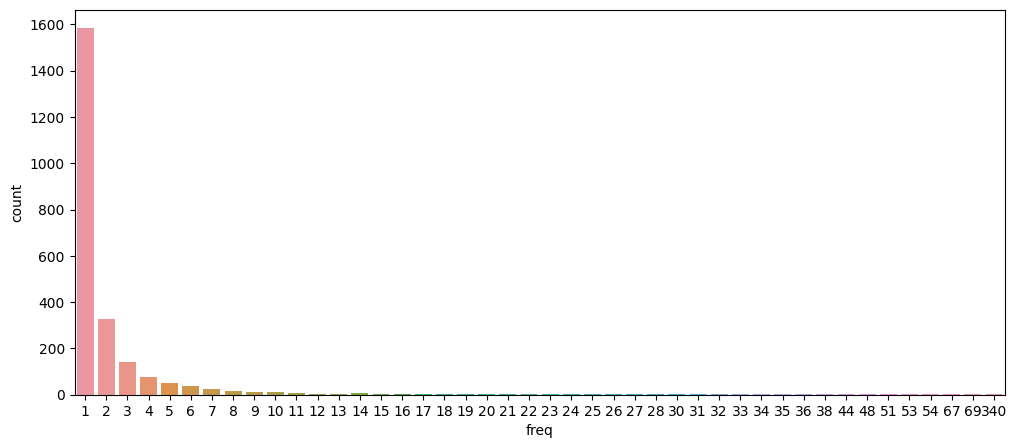

In [103]:
import seaborn as sns
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(x = df_freq['freq'])

In [79]:
tmp = collections.Counter(fd_name)
find_words = ['배우', '감독']

### 방법1.
for k, v in tmp.items():
    if k in find_words:
        print(k + ":", v)
### 방법2.
print("-"*10)
print("내장 함수 사용:",tmp.get("배우"))

### 방법3.
print("-"*10)

indexNum = list(tmp.keys()).index("배우")
print(list(tmp.values())[indexNum])

배우: 30
감독: 27
----------
내장 함수 사용: 30
----------
30


In [86]:
df.drop('text_len', axis = 1, inplace = True)

In [87]:
strLen = [len(x) for x in df['document']]
df['text_len'] = strLen

부정적인 의견은 이유를 들며 설명하기 때문에 긍정 리뷰보다 긴 것으로 나타남

In [89]:
ne = df[df['label']==0]
ne['text_len'].describe()

count    508.000000
mean      36.041339
std       29.926608
min        1.000000
25%       16.000000
50%       27.000000
75%       44.000000
max      140.000000
Name: text_len, dtype: float64

In [91]:
po = df[df['label']==1]
po['text_len'].describe()

count    492.000000
mean      35.735772
std       30.332363
min        1.000000
25%       16.000000
50%       26.000000
75%       42.000000
max      140.000000
Name: text_len, dtype: float64

읽어보기 <a>https://wikidocs.net/22933</a>

### **SOYNLP의 응집 확률(cohesion probability)**
* **Chain rule**
* 예) "반포한강공원"에 "반포한강공원"의 출현 빈도는 얼마나 되는가


<img src = "https://wikidocs.net/images/page/92961/%EC%88%98%EC%8B%9D.png"></img>

<img src = "https://wikidocs.net/images/page/92961/%EC%88%98%EC%8B%9D2.png">

* **Bag of Words** : 단어의 출현 빈도로만 텍스트 데이터를 수치화 하는 방법(문맥 고려x)
* **언어 모델(Language Model)**
* **원-핫 인코딩(One-Hot Encoding)**

* **케라스 전처리 도구로 패딩하기**

* **문서 단어 행렬(Document-Term Matrix, DTM)**
    > 문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다.
    <br>**문서에서 단어 등장한 횟수가 TF(Term Frequency)**

    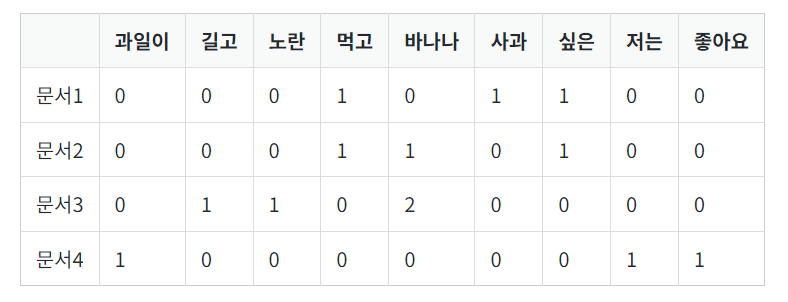

* **TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)**
    > * TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

    > * TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

    
* TF-IDF에서 IDF는 **역 문서 빈도(Inverse Document Frequency)** 의 약자로, 특정 단어가 전체 문서 집합에서 얼마나 흔한지를 나타내는 지표입니다.

* IDF 값 의미:
    * 높은 IDF 값: 특정 단어가 드물게 등장하여 중요도가 높음을 의미합니다.
    * 낮은 IDF 값: 특정 단어가 자주 등장하여 중요도가 낮음을 의미합니다.

* 예시:
    * "인공지능"이라는 단어가 100개 문서 중 10개 문서에만 등장하면 IDF 값이 높아집니다.
    * "the"라는 단어가 100개 문서 중 90개 문서에 등장하면 IDF 값이 낮아집니다.